In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2025-05-08 20:01:17.633685: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 20:01:17.689608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-08 20:01:17.689733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-08 20:01:17.691085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-08 20:01:17.698869: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 20:01:17.699721: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Print head
print("x_train shape:", x_train.shape)
print("First 5 labels:", y_train[:5])

x_train shape: (60000, 28, 28)
First 5 labels: [9 0 0 3 0]


In [4]:
# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

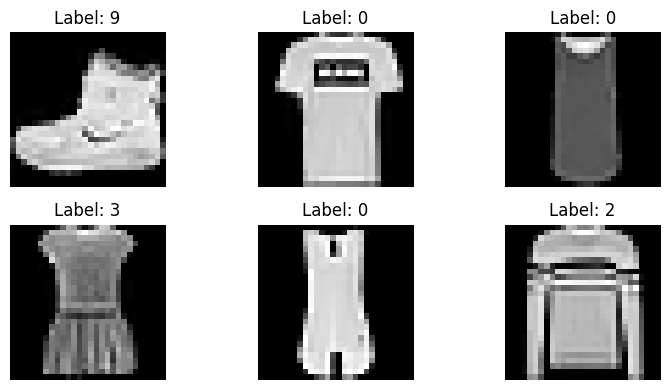

In [5]:
# Visualize
plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [9]:
# Train
model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.5403 - accuracy: 0.8013 - val_loss: 0.3754 - val_accuracy: 0.8637
Epoch 2/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3558 - accuracy: 0.8705 - val_loss: 0.3057 - val_accuracy: 0.8844
Epoch 3/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3039 - accuracy: 0.8887 - val_loss: 0.2835 - val_accuracy: 0.8949
Epoch 4/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2739 - accuracy: 0.8996 - val_loss: 0.2635 - val_accuracy: 0.9041
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2495 - accuracy: 0.9075 - val_loss: 0.2542 - val_accuracy: 0.9083
Epoch 6/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2282 - accuracy: 0.9139 - val_loss: 0.2630 - val_accuracy: 0.9043
Epoch 7/10
1500/1500 [==============================] - 35s 24ms/step - loss: 0.2107 - accuracy: 0.9212 - val_loss: 0.2450 -

In [10]:
# Save model
model.save("fashion_mnist_cnn.h5")

/root/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Evaluate
test_sample = np.expand_dims(x_test[0], axis=0)
pred = model.predict(test_sample)
print("Predicted:", np.argmax(pred), "| Actual:", y_test[0])

1/1 [==============================] - 0s 112ms/step
Predicted: 9 | Actual: 9


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8365eab-db7b-47eb-a47e-443fcca51d5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>